**<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Import Libraries </p>
<a class="btn" href="#home"></a>

In [191]:
import pandas as pd
import numpy as np
import re
import random
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import plotly.graph_objects as go
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

**<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Read Data </p>
<a class="btn" href="#home"></a>

In [4]:
data = pd.read_json('unpacked.json')
data.head()

Context Knowledge                                           Response
0      Hi  greeting    Hello there. Tell me how are you feeling today?
1      Hi  greeting              Hi there. What brings you here today?
2      Hi  greeting               Hi there. How are you feeling today?
3      Hi  greeting       Great to see you. How do you feel currently?
4      Hi  greeting  Hello there. Glad to see you're back. What's g...

**<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">EDA </p>
<a class="btn" href="#home"></a>

In [7]:
data.shape

(661, 3)

In [9]:
data.iloc[90:130]

Context         Knowledge  \
90              Bye then           goodbye   
91              Bye then           goodbye   
92              Bye then           goodbye   
93        Fare thee well           goodbye   
94        Fare thee well           goodbye   
95        Fare thee well           goodbye   
96        Fare thee well           goodbye   
97                Thanks            thanks   
98                Thanks            thanks   
99                Thanks            thanks   
100               Thanks            thanks   
101            Thank you            thanks   
102            Thank you            thanks   
103            Thank you            thanks   
104            Thank you            thanks   
105       That's helpful            thanks   
106       That's helpful            thanks   
107       That's helpful            thanks   
108       That's helpful            thanks   
109  Thanks for the help            thanks   
110  Thanks for the help            thanks   
111  Thanks for the help            thanks   
112  Thanks for the help            thanks   
113   Than you very much            thanks   
114   Than you very much            thanks   
115   Than you very much            thanks   
116   Than you very much            thanks   
117                            no-response   
118                            no-response   
119                            no-response   
120                            no-response   
121         nothing much  neutral-response   
122         Who are you?             about   
123         Who are you?             about   
124         Who are you?             about   
125         Who are you?             about   
126         Who are you?             about   
127         Who are you?             about   
128        What are you?             about   
129        What are you?             about   

                                              Response  
90                                    Have a nice day.  
91                               Bye! Come back again.  
92                                  I'll see you soon.  
93                                      See you later.  
94                                    Have a nice day.  
95                               Bye! Come back again.  
96                                  I'll see you soon.  
97                                      Happy to help!  
98                                           Any time!  
99                                         My pleasure  
100                               You're most welcome!  
101                                     Happy to help!  
102                                          Any time!  
103                                        My pleasure  
104                               You're most welcome!  
105                                     Happy to help!  
106                                          Any time!  
107                                        My pleasure  
108                               You're most welcome!  
109                                     Happy to help!  
110                                          Any time!  
111                                        My pleasure  
112                               You're most welcome!  
113                                     Happy to help!  
114                                          Any time!  
115                                        My pleasure  
116                               You're most welcome!  
117                    Sorry, I didn't understand you.  
118                                      Please go on.  
119                        Not sure I understand that.  
120               Please don't hesitate to talk to me.  
121     Oh I see. Do you want to talk about something?  
122  I'm Pandora, your Personal Therapeutic AI Assi...  
123  I'm Pandora, a Therapeutic AI Assitant designe...  
124  I'm Pandora. I am a conversational agent desig...  
125                           You can call me Pandora.  
126                  

In [11]:
data.tail()

Context Knowledge  \
656                       How do I know if I'm unwell?   fact-29   
657  How can I maintain social connections? What if...   fact-30   
658  What's the difference between anxiety and stress?   fact-31   
659  What's the difference between sadness and depr...   fact-32   
660          difference between sadness and depression   fact-32   

                                              Response  
656  If your beliefs , thoughts , feelings or behav...  
657  A lot of people are alone right now, but we do...  
658  Stress and anxiety are often used interchangea...  
659  Sadness is a normal reaction to a loss, disapp...  
660  Sadness is a normal reaction to a loss, disapp...

In [13]:
data.shape

(661, 3)

In [15]:
data.isna().sum()

Context      0
Knowledge    0
Response     0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Context    661 non-null    object
 1   Knowledge  661 non-null    object
 2   Response   661 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


In [19]:
data.describe()

Context Knowledge  \
count          661       661   
unique         231        80   
top     not really    casual   
freq             7        66   

                                                 Response  
count                                                 661  
unique                                                155  
top     Let's discuss further why you're feeling this ...  
freq                                                   16

In [21]:
#number of words
def get_corpus(series):
    words = []
    for text in series:
        for word in text.split():
            words.append(word.strip())
    return words

corpus_response = get_corpus(data.Response)
print(f"dataset Response contains  {len(corpus_response)} words")

dataset Response contains  10151 words


In [39]:
corpus_context = get_corpus(data.Context)
print(f"dataset context contains {len(corpus_context)} words")

dataset context contains 2329 words


In [129]:
def R_len(df):
    try:
        return df['Response'].apply(len).max()
    except:
        return df['Response'].str.len().max()


def C_len(df):
    try:
        return df['Context'].apply(len).max()
    except:
        return df['Context'].str.len().max()
print(f"max len of context  {C_len(data)}")
print(f"max len of response  {C_len(data)}")

max len of context  111
max len of response  111


In [130]:
# no of patterns

data.Knowledge.value_counts(sort=False)

greeting     60
morning       1
afternoon     1
evening       1
night         2
             ..
fact-28       1
fact-29       1
fact-30       1
fact-31       1
fact-32       2
Name: Knowledge, Length: 80, dtype: int64

**<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Data visualization </p>
<a class="btn" href="#home"></a>

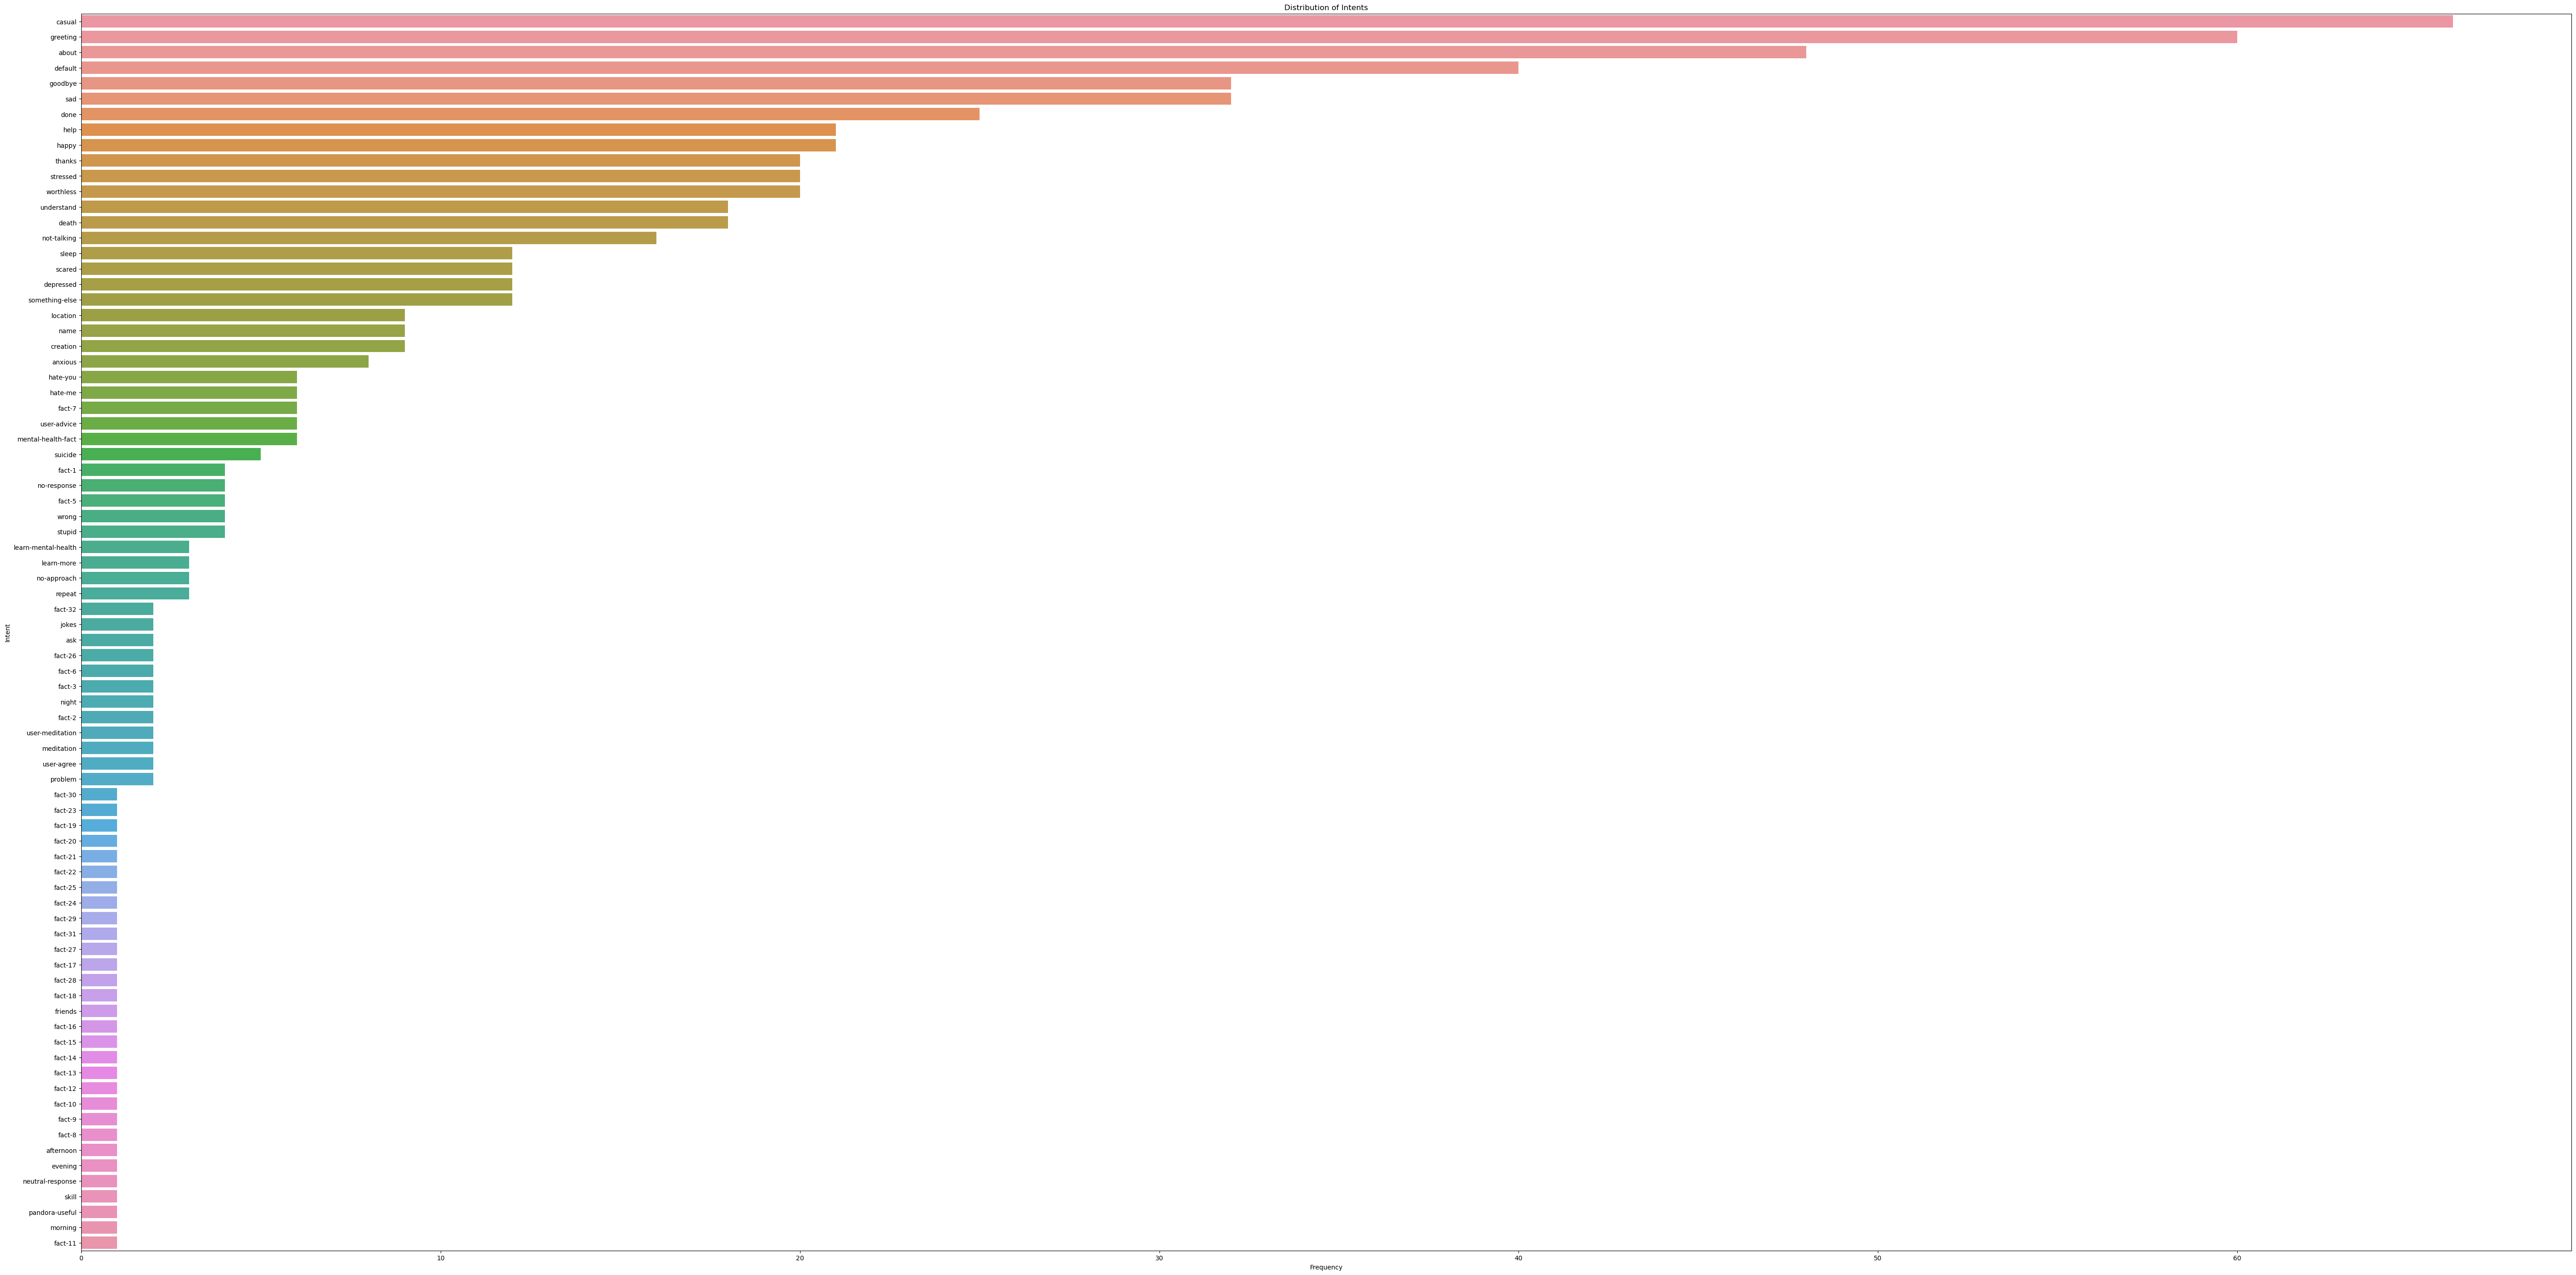

In [48]:
plt.figure(figsize=(70, 35))
sns.countplot(y=data['Knowledge'], order=data['Knowledge'].value_counts().index)
plt.title('Distribution of Intents')
plt.xlabel('Frequency')
plt.ylabel('Intent')
plt.show()

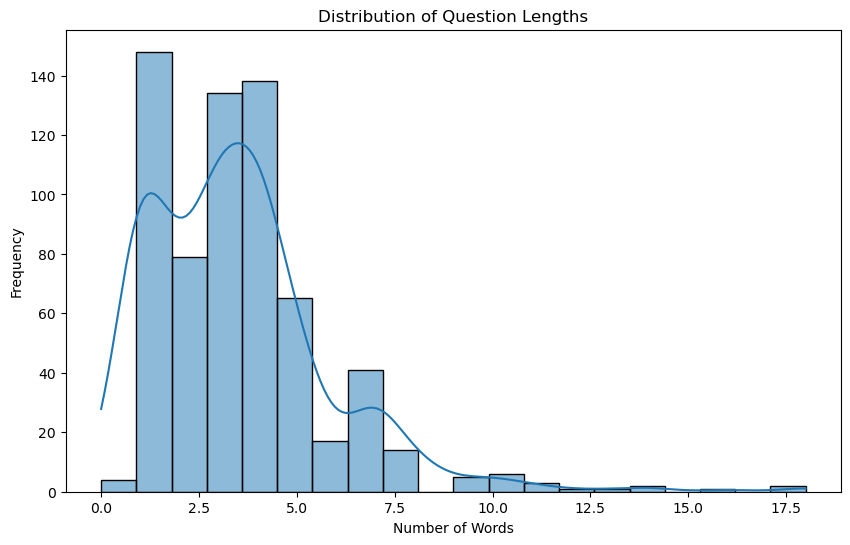

In [58]:
def plot_length_distribution(series, title):
    lengths = series.apply(lambda x: len(x.split()))
    plt.figure(figsize=(10, 6))
    sns.histplot(lengths, bins=20, kde=True)
    plt.title(title)
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.show()

plot_length_distribution(data['Context'], 'Distribution of Question Lengths')


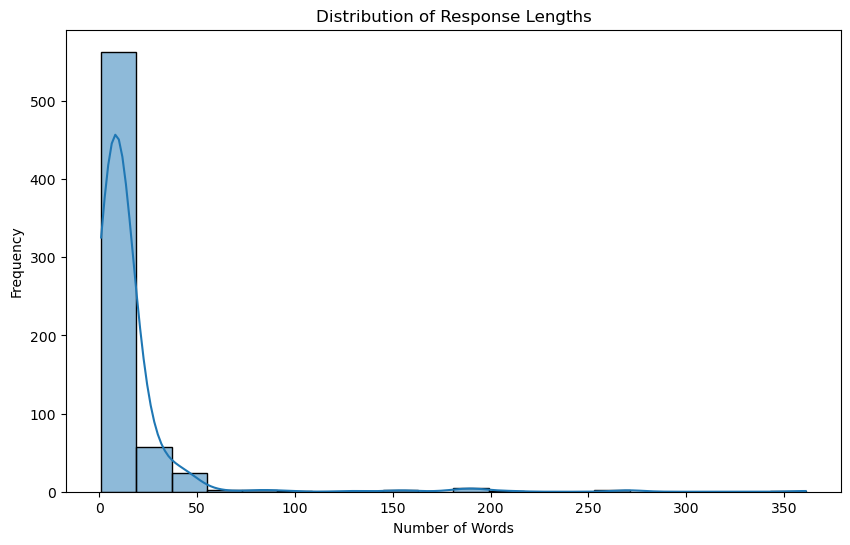

In [56]:
plot_length_distribution(data['Response'], 'Distribution of Response Lengths')

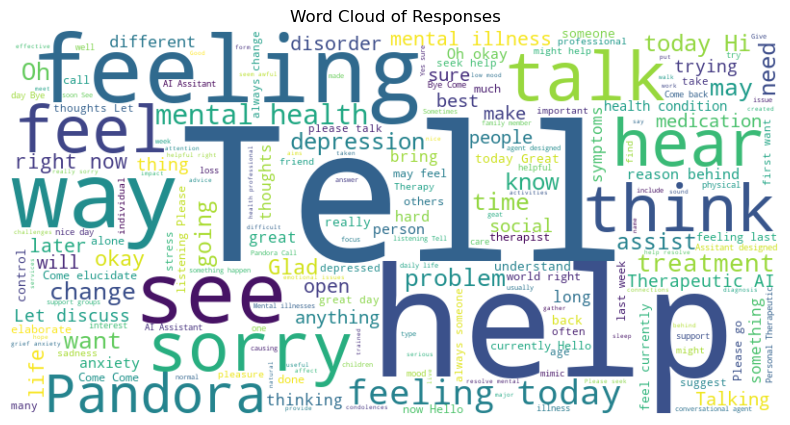

In [27]:
text = ' '.join(corpus_response)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Responses')
plt.show()

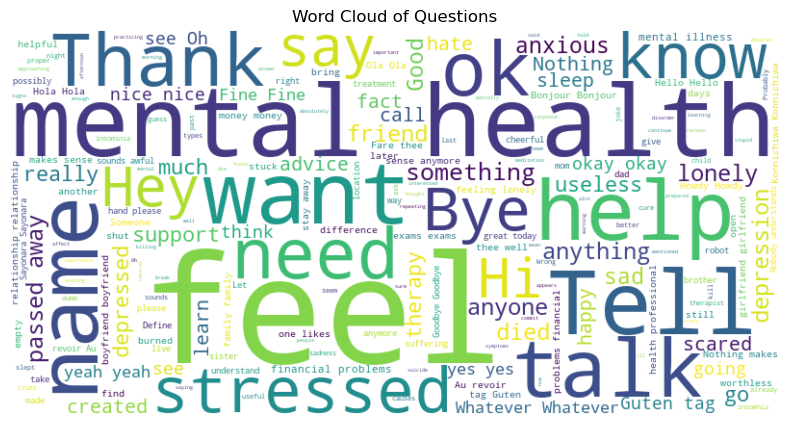

In [68]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

questions_text = ' '.join(data['Context'])
responses_text = ' '.join(data['Response'])
create_wordcloud(questions_text, 'Word Cloud of Questions')

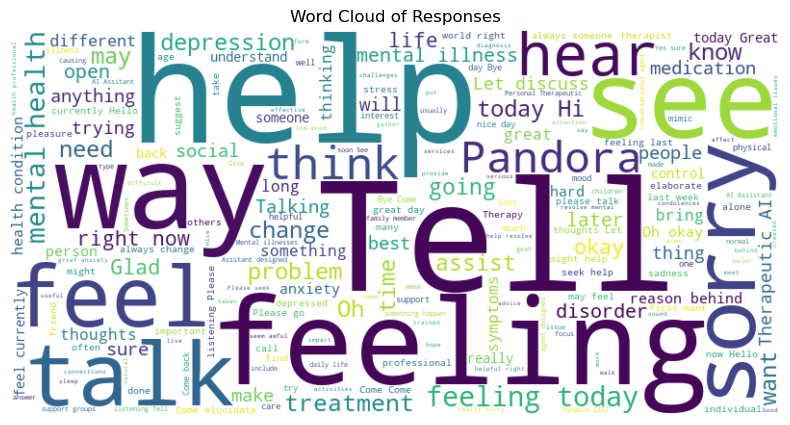

In [70]:
create_wordcloud(responses_text, 'Word Cloud of Responses')

<Figure size 1400x800 with 0 Axes>

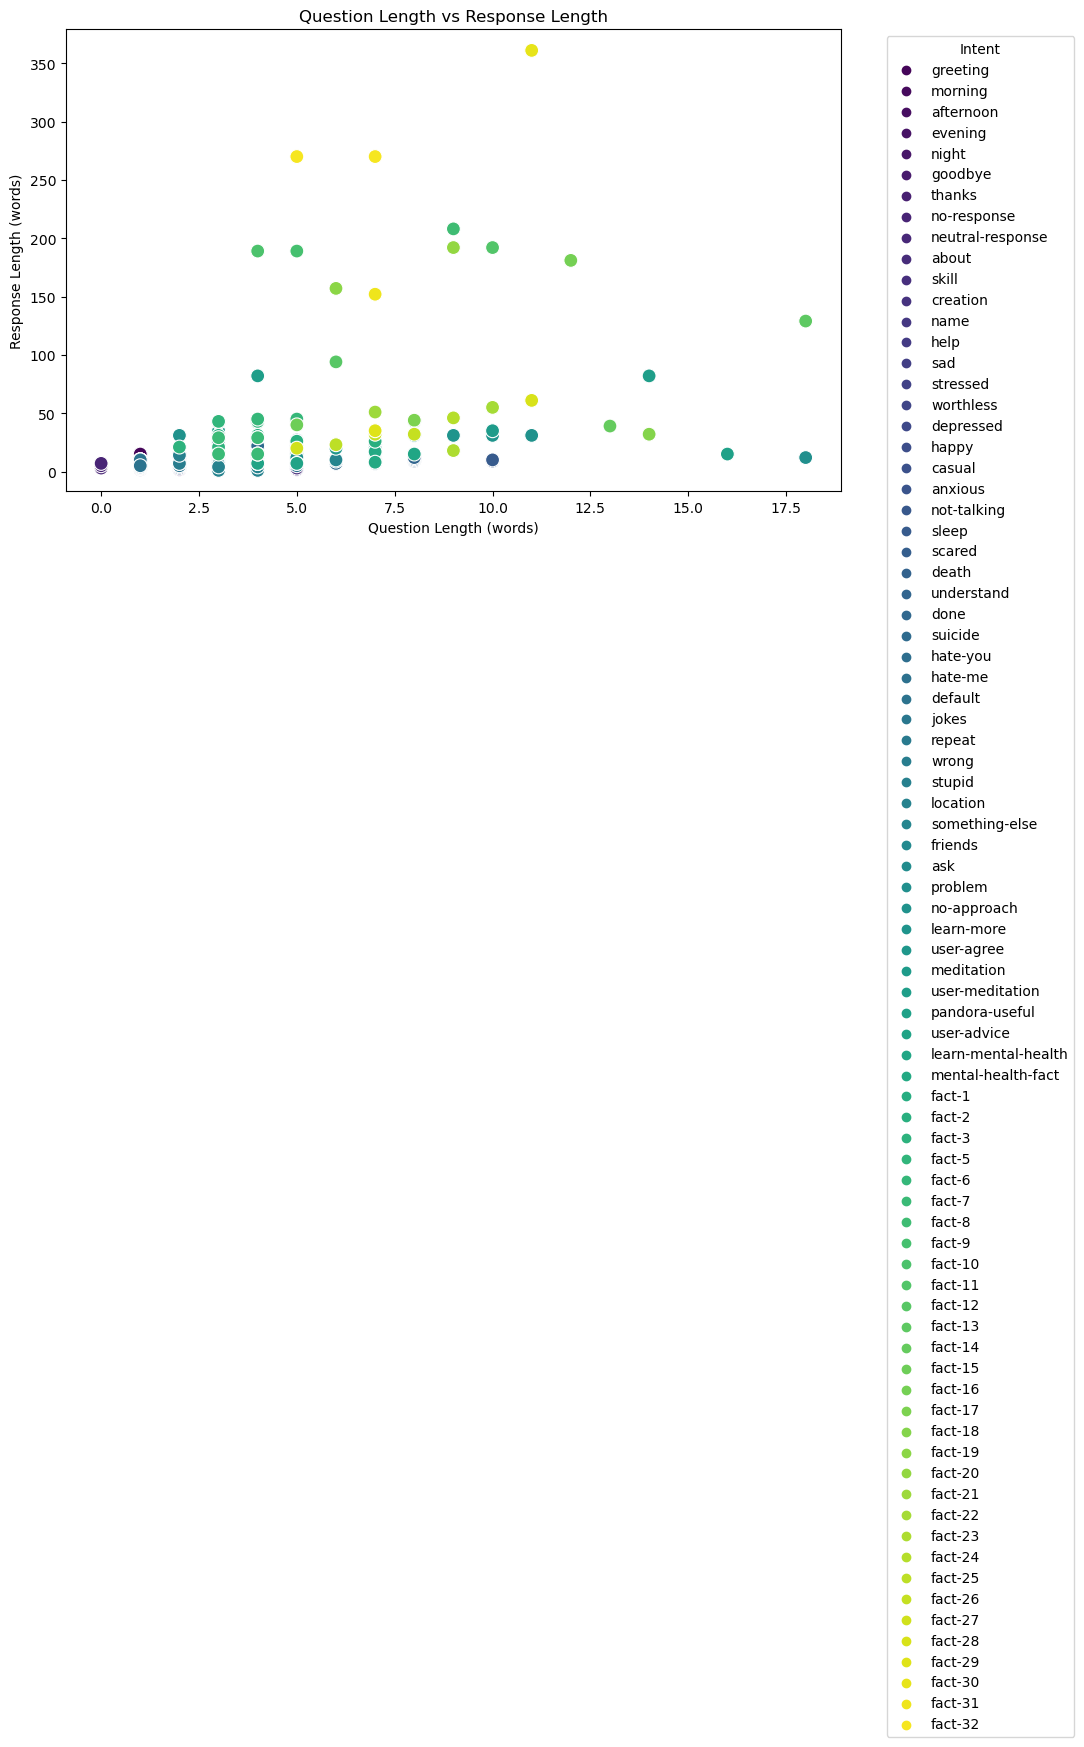

In [108]:
# Calculate text lengths
plt.figure(figsize=(14, 8))

data['QuestionLength'] = data['Context'].apply(lambda x: len(x.split()))
data['ResponseLength'] = data['Response'].apply(lambda x: len(x.split()))

# Scatter plot: Question Length vs Response Length colored by Intent
plt.figure(figsize=(10, 6))
sns.scatterplot(x='QuestionLength', y='ResponseLength', hue='Knowledge', data=data, palette='viridis', s=100)
plt.title('Question Length vs Response Length')
plt.xlabel('Question Length (words)')
plt.ylabel('Response Length (words)')
plt.legend(title='Intent')
plt.legend(title='Intent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


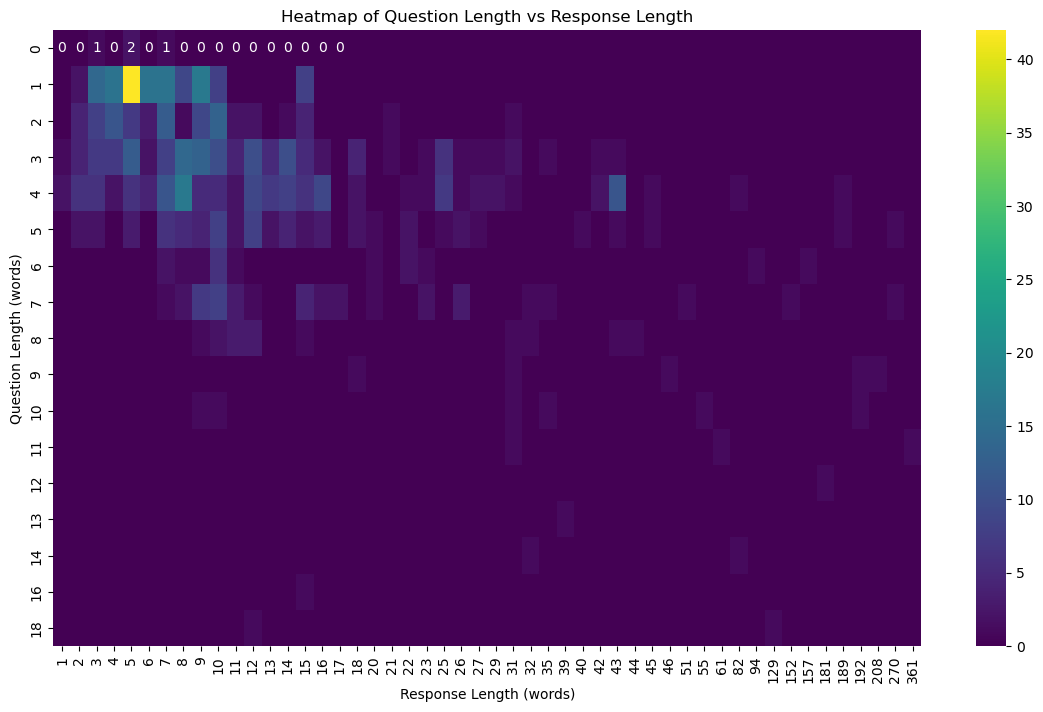

In [118]:
pivot_table = data.pivot_table(index='QuestionLength', columns='ResponseLength', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis')
plt.title('Heatmap of Question Length vs Response Length')
plt.xlabel('Response Length (words)')
plt.ylabel('Question Length (words)')
plt.show()

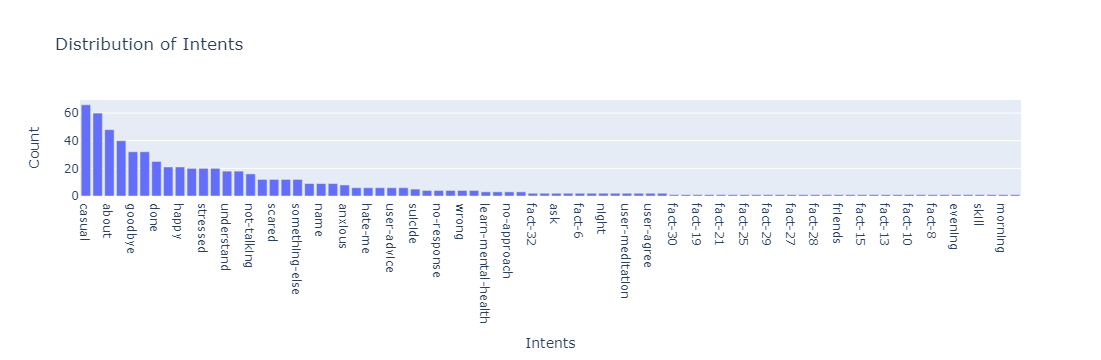

In [38]:
intent_counts = data['Knowledge'].value_counts()
fig = go.Figure(data=[go.Bar(x=intent_counts.index, y=intent_counts.values)])
fig.update_layout(title='Distribution of Intents', xaxis_title='Intents', yaxis_title='Count')
fig.show()

**<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">preprocessing</p>
<a class="btn" href="#home"></a>

In [77]:
# Preprocessing
data['Context'] = data['Context'].apply(lambda x: x.lower())
data['Context'] = data['Context'].apply(lambda x: re.sub(r'[?!,]', '', x))  # Remove specified characters

In [79]:
# Shuffle the data
data_shuffled = data.sample(frac=1, random_state=42)  # Shuffle with random_state for reproducibilit

In [81]:
# Split the shuffled data into features (X) and target (y)
X = data_shuffled['Context']
y = data_shuffled['Knowledge']

In [126]:
# Handle class imbalance using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X.values.reshape(-1, 1), y)

In [128]:
# Convert the resampled data back to DataFrame 
X_resampled = pd.DataFrame(X_resampled.flatten(), columns=['Context'])
y_resampled = pd.Series(y_resampled)

In [134]:
#split the data to train 80% and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_resampled['Context'], y_resampled, test_size=0.2, random_state=42)

**<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Model Train</p>
<a class="btn" href="#home"></a>

In [145]:

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(probability=True))
])

# Define hyperparameters to tune
param_grid = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

best_model.named_steps['tfidf'].fit(X_train)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Additional evaluation using cross-validation
cv_scores = cross_val_score(best_model, X_resampled['Context'], y_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


                     precision    recall  f1-score   support

              about       1.00      1.00      1.00        11
          afternoon       1.00      1.00      1.00        15
            anxious       1.00      1.00      1.00        13
                ask       1.00      1.00      1.00        18
             casual       1.00      0.81      0.90        16
           creation       1.00      1.00      1.00        10
              death       1.00      1.00      1.00        11
            default       1.00      1.00      1.00        12
          depressed       1.00      1.00      1.00        14
               done       1.00      1.00      1.00        13
            evening       1.00      1.00      1.00        11
             fact-1       1.00      1.00      1.00        16
            fact-10       1.00      1.00      1.00        11
            fact-11       1.00      1.00      1.00        14
            fact-12       1.00      1.00      1.00        12
            fact-13    

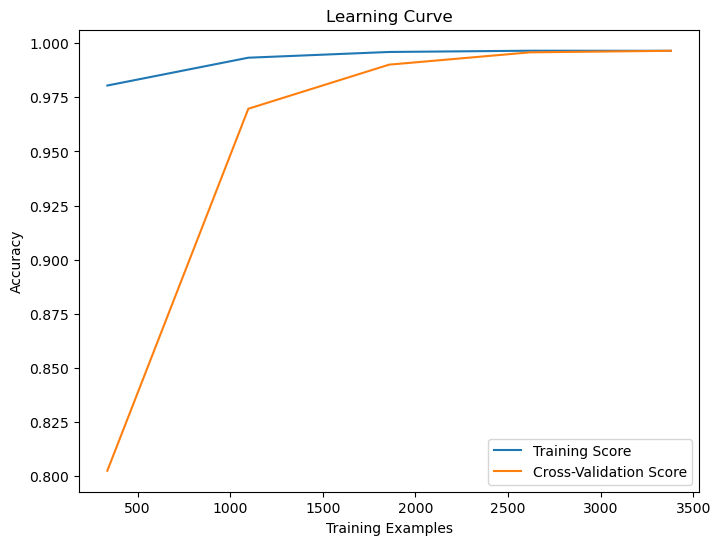

In [153]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(best_model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), return_times=True)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

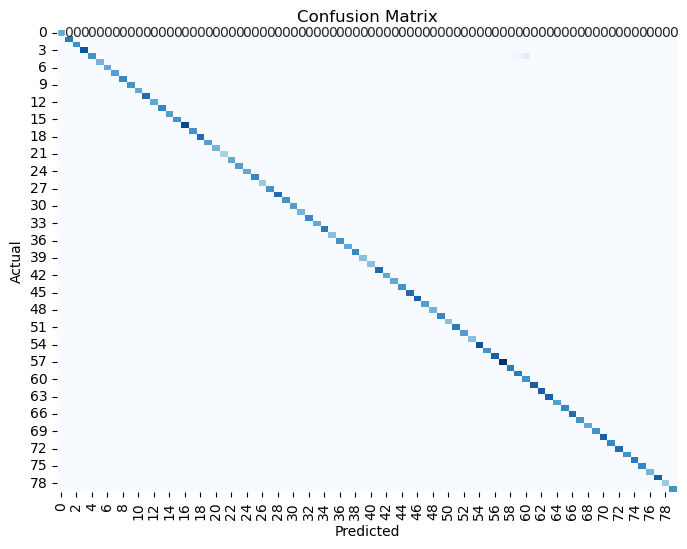

In [170]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Assuming y_test and y_pred are already defined

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [185]:
# Save the trained pipeline
import pickle

# Save the best model to a pickle file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


In [187]:
import pickle

# Load the saved model from the pickle file
with open('best_model.pkl', 'rb') as f:
    model = pickle.load(f)


In [195]:
# Load the JSON dataset
with open('unpacked.json', 'r') as f:
    dataset = json.load(f)

# Function to predict the intent of the user input
def predict_intent(user_input):
    # Use the loaded model to predict the intent
    predicted_intent =model.predict([user_input])[0]
    return predicted_intent

# Function to select a random response from the dataset based on the intent
def get_random_response(intent):
    # Filter the dataset for the intent and select a random response
    intent_responses = [item['Response'] for item in dataset if item['Knowledge'] == intent]
    if intent_responses:
        return random.choice(intent_responses)
    else:
        return "I'm sorry, I didn't understand that. Could you please rephrase?"

# Test the chatbot
user_input = "  "
predicted_intent = predict_intent(user_input)
random_response = get_random_response(predicted_intent)
print(f"User: {user_input}")
print(f"Bot: {random_response}")

User:   
Bot: Not sure I understand that.
